**Machine Learning Basic Principles 2018 - Data Analysis Project Report**

*All the text in italics is instructions for filling the template - remove when writing the project report!*

# *Title* 

*Title should be concise and informative, describes the approach to solve the problem. Some good titles from previous years:*

*- Comparing extreme learning machines and naive bayes’ classifier in spam detection*

*- Using linear discriminant analysis in spam detection*

*Some not-so-good titles:*

*- Bayesian spam filtering with extras*

*- Two-component classifier for spam detection*

*- CS-E3210 Term Project, final report*




## Abstract

*Precise summary of the whole report, previews the contents and results. Must be a single paragraph between 100 and 200 words.*



## 1. Introduction

*Background, problem statement, motivation, many references, description of
contents. Introduces the reader to the topic and the broad context within which your
research/project fits*

*- What do you hope to learn from the project?*
*- What question is being addressed?*
*- Why is this task important? (motivation)*

*Keep it short (half to 1 page).*



## 2. Data analysis

*Briefly describe data (class distribution, dimensionality) and how will it affect
classification. Visualize the data. Don’t focus too much on the meaning of the features,
unless you want to.*

*- Include histograms showing class distribution.*



In [1]:
# Import libraries
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn import svm

# Load files
test_data_accuracy = pd.read_csv('./accuracy/test_data.csv', header=None)
train_data_accuracy = pd.read_csv('./accuracy/train_data.csv', header=None)
train_labels_accuracy = pd.read_csv('./accuracy/train_labels.csv', header=None)

# Parse loaded content
test_data_accuracy = test_data_accuracy.values
train_data_accuracy = train_data_accuracy.values
train_labels_accuracy = train_labels_accuracy.values

## Accuracy
This notebooks starts with the accuracy challenge

### Contents
1. Data visualization: how are the raw data provided?
2. Data manipulation
3. ML Algorithm

### 1. Data visualiztion

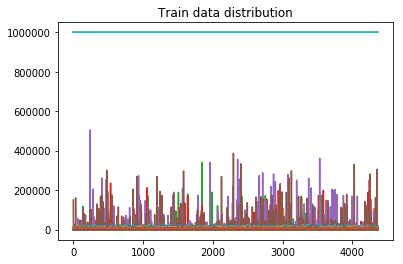

0: the mean of the row is 3097.6837141874857, the variance is 1309.0692857348045
1: the mean of the row is 4390.947407746963, the variance is 1457.4587612355328
2: the mean of the row is 3987.6724648177865, the variance is 1228.0451095791652
3: the mean of the row is 4004.8619963327988, the variance is 1242.1942545491834
4: the mean of the row is 3086.664977538391, the variance is 1030.9023393536486
5: the mean of the row is 3329.8158721063487, the variance is 1124.7167746529087
6: the mean of the row is 3043.6283566353427, the variance is 1097.579688975519
7: the mean of the row is 3034.5740660096267, the variance is 1120.9355528403764
8: the mean of the row is 2671.4632661013065, the variance is 1017.6653200605061
9: the mean of the row is 2440.4640155856064, the variance is 969.9172127780054
10: the mean of the row is 2516.1047536099013, the variance is 1021.0732882824636
11: the mean of the row is 2566.444592940637, the variance is 1116.7614481250025
12: the mean of the row is 3215

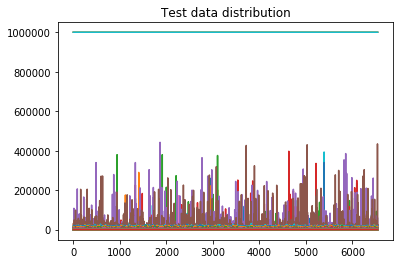

0: the mean of the row is 3058.037015281174, the variance is 1311.1698379910013
1: the mean of the row is 4355.873590158924, the variance is 1486.8149723707027
2: the mean of the row is 3932.126318306846, the variance is 1258.336101811341
3: the mean of the row is 3951.374645782396, the variance is 1250.3599839907881
4: the mean of the row is 3047.5962448044006, the variance is 1034.1695765009956
5: the mean of the row is 3274.0433621638144, the variance is 1134.0023775824293
6: the mean of the row is 3001.383569987775, the variance is 1107.1998411281695
7: the mean of the row is 2985.446799358191, the variance is 1125.6622376587304
8: the mean of the row is 2611.920900061125, the variance is 1004.5212503017566
9: the mean of the row is 2404.7300140586794, the variance is 961.9918696264746
10: the mean of the row is 2486.13600351467, the variance is 1015.6044761497946
11: the mean of the row is 2532.365589700489, the variance is 1106.6088580009318
12: the mean of the row is 3179.235164

In [2]:
# Visualizes the training_data
plt.plot(train_data_accuracy)
plt.title('Train data distribution')
plt.show()
mean = np.mean(train_data_accuracy, axis=0)
std = np.std(train_data_accuracy, axis=0)
for i in range(len(mean)):
    print(f'{i}: the mean of the row is {mean[i]}, the variance is {std[i]}')
# Visualizes the test_data
plt.plot(test_data_accuracy)
plt.title('Test data distribution')
plt.show()
mean = np.mean(test_data_accuracy, axis=0)
std = np.std(test_data_accuracy, axis=0)
for i in range(len(mean)):
    print(f'{i}: the mean of the row is {mean[i]}, the variance is {std[i]}')

#### Observations
As we can see the training data nor the test data are normalized. In addition to it, labels are not equally distribuited: indeed there are more label of class 1 (almost 50%), Pop_Rock, then any other classes as we can see in the cell below. The figure below represents the occurence (in %) of each label.

Label 1 (Pop_Rock): 49.92%
Label 2 (Electronic): 14.16%
Label 3 (Rap): 7.47%
Label 4 (Jazz): 5.8%
Label 5 (Latin): 4.9%
Label 6 (RnB): 5.96%
Label 7 (International): 3.23%
Label 8 (Country): 4.47%
Label 9 (Reggae): 2.11%
Label 10 (Blues): 1.97%


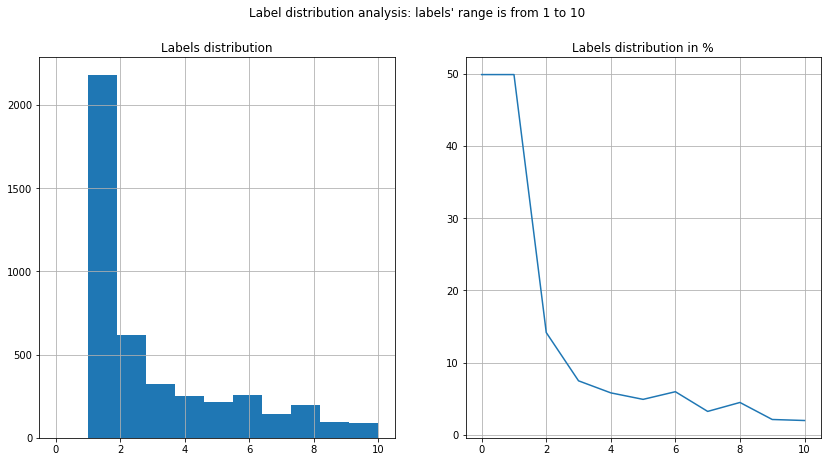

In [3]:
# Visualizes the labels
class_names = ['Pop_Rock', 'Electronic', 'Rap', 'Jazz', 'Latin', 'RnB', 'International', 'Country', 'Reggae', 'Blues']
# Since labels start by 1, in the first position of the data array, I inserted again the value of the first label, to obtain a decent plot
data = np.empty((11, 2))
for i in range(1, 11, 1):
    print(f'Label {i} ({class_names[i - 1]}): {round((len(np.where(train_labels_accuracy == i)[0]) / len(train_labels_accuracy)) * 100, 2)}%')
    data[0, 0] = 0
    data[0, 1] = round((len(np.where(train_labels_accuracy == 1)[0]) / len(train_labels_accuracy)) * 100, 2)
    data[i, 0] = i
    data[i, 1] = round((len(np.where(train_labels_accuracy == i)[0]) / len(train_labels_accuracy)) * 100, 2)

fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(14, 7))
ax = axs[0]
ax.hist(train_labels_accuracy)
ax.set_title('Labels distribution')
ax.grid(True)

ax = axs[1]
ax.plot(data[:, 1])
ax.set_title('Labels distribution in %')
ax.grid(True)


fig.suptitle('Label distribution analysis: labels\' range is from 1 to 10')
plt.show()

### 2. Data manipulation
#### Cleanup
Some columns (205 to 220) contains features whose values are not aligned with the others: so we can eliminate them.  
*Now each song has 248 features instead of 264.*

In [4]:
# Eliminates the data
print(f'Train data shape before resize is: {train_data_accuracy.shape}, Test data shape is: {test_data_accuracy.shape}')
train_data_accuracy = np.delete(train_data_accuracy, [204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220], 1)
test_data_accuracy = np.delete(test_data_accuracy, [204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220], 1)
# Let's check that the elimination process succeded
print(f'Train data shape after resize is: {train_data_accuracy.shape}, Test data shape is: {test_data_accuracy.shape}')

Train data shape before resize is: (4363, 264), Test data shape is: (6544, 264)
Train data shape after resize is: (4363, 247), Test data shape is: (6544, 247)


In [5]:
# Analysis of the input data
# Feature 1 - 169: Rhythm pattern
# Feature 170 - 217: Chroma
# Feature 218 - 264: MFCCs
# Scales the data before feeding them into ML algorithms
scaler = preprocessing.StandardScaler().fit(train_data_accuracy)
train_data_scaled = scaler.transform(train_data_accuracy)   
test_data_scaled = scaler.transform(test_data_accuracy)                
print(f'The mean of the train data is: {np.mean(train_data_scaled)}, the variance is {np.std(train_data_scaled)}')
print(f'The mean of the test data is: {np.mean(test_data_scaled)}, the variance is {np.std(test_data_scaled)}')

The mean of the train data is: -2.1243866991744553e-17, the variance is 0.9999999999999999
The mean of the test data is: -0.015131337459364057, the variance is 1.0168577361926652


### 3. ML Algorithm
After data cleanup, the algorithm used for the predictions is presented: this notebook uses the SVM - Support Vector Machine - to predict the labels.

In [6]:
clf = svm.SVC(gamma='scale', verbose=True)
clf.fit(train_data_scaled, np.ravel(train_labels_accuracy))

[LibSVM]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=True)

In [7]:
score = clf.score(train_data_scaled, train_labels_accuracy)
print(f'Algorithm accuracy is {np.round(score * 100, 2)}%')

Algorithm accuracy is 75.73%


Label 1 (Pop_Rock): 71.23%
Label 2 (Electronic): 13.72%
Label 3 (Rap): 7.76%
Label 4 (Jazz): 3.91%
Label 5 (Latin): 0.31%
Label 6 (RnB): 2.11%
Label 7 (International): 0.0%
Label 8 (Country): 0.49%
Label 9 (Reggae): 0.47%
Label 10 (Blues): 0.0%


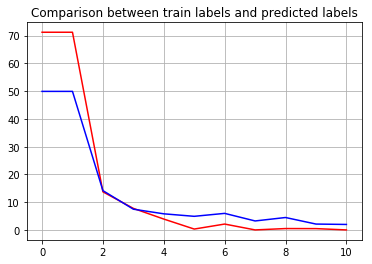

In [8]:
predictions = clf.predict(test_data_scaled)
data_p = np.empty((11, 2))
for i in range(1, 11, 1):
    print(f'Label {i} ({class_names[i - 1]}): {round((len(np.where(predictions == i)[0]) / len(predictions)) * 100, 2)}%')
    data_p[0, 0] = 0
    data_p[0, 1] = round((len(np.where(predictions == 1)[0]) / len(predictions)) * 100, 2)
    data_p[i, 0] = i
    data_p[i, 1] = round((len(np.where(predictions == i)[0]) / len(predictions)) * 100, 2)

plt.plot(data_p[:, 1], c='red')
plt.plot(data[:, 1], c='blue')
plt.grid(True)
plt.title('Comparison between train labels and predicted labels')
plt.show()

In [9]:
def save_prediction(pred):
    prediction = pd.DataFrame(pred, columns=['Sample_label'])
    prediction.index += 1 
    prediction.to_csv('prediction_SVN.csv',index_label="Sample_id",index=1)
    
save_prediction(predictions)

## Log-loss
After the accuracy challenge, this section is focused on the log-loss challenge.

### Contents
1. Data visualization: how are the raw data provided?
2. Data manipulation
3. ML Algorithm

In [10]:
# Libraries are already imported

# Loads the files
test_data_logloss = pd.read_csv('./log-loss/test_data.csv', header=None)
train_data_logloss = pd.read_csv('./log-loss/train_data.csv', header=None)
train_labels_logloss = pd.read_csv('./log-loss/train_labels.csv', header=None)

# Parse loaded content
test_data_logloss = test_data_logloss.values
train_data_logloss = train_data_logloss.values
train_labels_logloss = train_labels_logloss.values

### 1. Data visualization

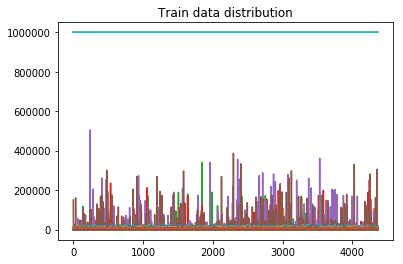

0: the mean of the row is 3097.6837141874857, the variance is 1309.0692857348045
1: the mean of the row is 4390.947407746963, the variance is 1457.4587612355328
2: the mean of the row is 3987.6724648177865, the variance is 1228.0451095791652
3: the mean of the row is 4004.8619963327988, the variance is 1242.1942545491834
4: the mean of the row is 3086.664977538391, the variance is 1030.9023393536486
5: the mean of the row is 3329.8158721063487, the variance is 1124.7167746529087
6: the mean of the row is 3043.6283566353427, the variance is 1097.579688975519
7: the mean of the row is 3034.5740660096267, the variance is 1120.9355528403764
8: the mean of the row is 2671.4632661013065, the variance is 1017.6653200605061
9: the mean of the row is 2440.4640155856064, the variance is 969.9172127780054
10: the mean of the row is 2516.1047536099013, the variance is 1021.0732882824636
11: the mean of the row is 2566.444592940637, the variance is 1116.7614481250025
12: the mean of the row is 3215

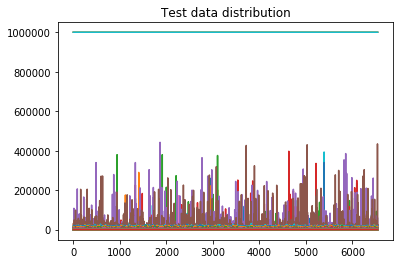

0: the mean of the row is 3058.037015281174, the variance is 1311.1698379910013
1: the mean of the row is 4355.873590158924, the variance is 1486.8149723707027
2: the mean of the row is 3932.126318306846, the variance is 1258.336101811341
3: the mean of the row is 3951.374645782396, the variance is 1250.3599839907881
4: the mean of the row is 3047.5962448044006, the variance is 1034.1695765009956
5: the mean of the row is 3274.0433621638144, the variance is 1134.0023775824293
6: the mean of the row is 3001.383569987775, the variance is 1107.1998411281695
7: the mean of the row is 2985.446799358191, the variance is 1125.6622376587304
8: the mean of the row is 2611.920900061125, the variance is 1004.5212503017566
9: the mean of the row is 2404.7300140586794, the variance is 961.9918696264746
10: the mean of the row is 2486.13600351467, the variance is 1015.6044761497946
11: the mean of the row is 2532.365589700489, the variance is 1106.6088580009318
12: the mean of the row is 3179.235164

In [11]:
# Visualizes the training_data
plt.plot(train_data_logloss)
plt.title('Train data distribution')
plt.show()
mean = np.mean(train_data_logloss, axis=0)
std = np.std(train_data_logloss, axis=0)
for i in range(len(mean)):
    print(f'{i}: the mean of the row is {mean[i]}, the variance is {std[i]}')
# Visualizes the test_data
plt.plot(test_data_logloss)
plt.title('Test data distribution')
plt.show()
mean = np.mean(test_data_logloss, axis=0)
std = np.std(test_data_logloss, axis=0)
for i in range(len(mean)):
    print(f'{i}: the mean of the row is {mean[i]}, the variance is {std[i]}')

#### Observations
As we can see the training data nor the test data are normalized. In addition to it, labels are not equally distribuited: indeed there are more label of class 1 (almost 50%), Pop_Rock, then any other classes as we can see in the cell below. The figure below represents the occurence (in %) of each label.

Label 1 (Pop_Rock): 49.92%
Label 2 (Electronic): 14.16%
Label 3 (Rap): 7.47%
Label 4 (Jazz): 5.8%
Label 5 (Latin): 4.9%
Label 6 (RnB): 5.96%
Label 7 (International): 3.23%
Label 8 (Country): 4.47%
Label 9 (Reggae): 2.11%
Label 10 (Blues): 1.97%


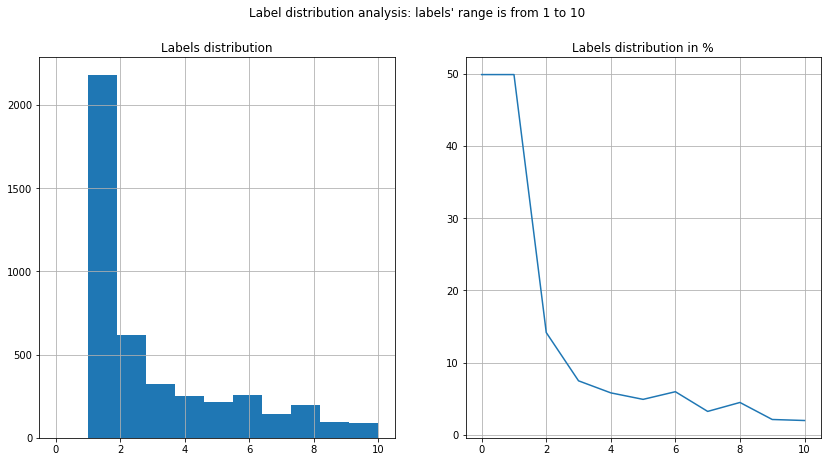

In [12]:
# Visualizes the labels
class_names = ['Pop_Rock', 'Electronic', 'Rap', 'Jazz', 'Latin', 'RnB', 'International', 'Country', 'Reggae', 'Blues']
# Since labels start by 1, in the first position of the data array, I inserted again the value of the first label, to obtain a decent plot
data = np.empty((11, 2))
for i in range(1, 11, 1):
    print(f'Label {i} ({class_names[i - 1]}): {round((len(np.where(train_labels_logloss == i)[0]) / len(train_labels_logloss)) * 100, 2)}%')
    data[0, 0] = 0
    data[0, 1] = round((len(np.where(train_labels_logloss == 1)[0]) / len(train_labels_logloss)) * 100, 2)
    data[i, 0] = i
    data[i, 1] = round((len(np.where(train_labels_logloss == i)[0]) / len(train_labels_logloss)) * 100, 2)

fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(14, 7))
ax = axs[0]
ax.hist(train_labels_logloss)
ax.set_title('Labels distribution')
ax.grid(True)

ax = axs[1]
ax.plot(data[:, 1])
ax.set_title('Labels distribution in %')
ax.grid(True)

fig.suptitle('Label distribution analysis: labels\' range is from 1 to 10')
plt.show()

### 2. Data manipulation
#### Cleanup
Some columns (205 to 220) contains features whose values are not aligned with the others: so we can eliminate them.  
*Now each song has 248 features instead of 264.*

In [13]:
# Analysis of the input data
# Feature 1 - 169: Rhythm pattern
# Feature 170 - 217: Chroma
# Feature 218 - 264: MFCCs
# Scales the data before feeding them into ML algorithms
scaler = preprocessing.StandardScaler().fit(train_data_logloss)
train_data_scaled = scaler.transform(train_data_logloss)   
test_data_scaled = scaler.transform(test_data_logloss)                
print(f'The mean of the train data is: {np.mean(train_data_scaled)}, the variance is {np.std(train_data_scaled)}')
print(f'The mean of the test data is: {np.mean(test_data_scaled)}, the variance is {np.std(test_data_scaled)}')

The mean of the train data is: -3.9591392478315614e-17, the variance is 0.9923953268977462
The mean of the test data is: -0.014540757008522483, the variance is 1.0115121161980416


### 3. ML Algorithm
After data cleanup, the algorithm used for the predictions is presented: this notebook uses the SVM - Support Vector Machine - to predict the labels.

In [14]:
clf = svm.SVC(gamma='scale', verbose=True, probability=True)
clf.fit(train_data_scaled, np.ravel(train_labels_logloss))

[LibSVM]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=True)

In [15]:
score = clf.score(train_data_scaled, train_labels_logloss)
print(f'Algorithm accuracy is {np.round(score * 100, 2)}%')

Algorithm accuracy is 75.43%


The shape of the predictions matrix is: (6544, 10)
Average probability for label 1 (Pop_Rock): 4922.98%
Average probability for label 2 (Electronic): 1410.69%
Average probability for label 3 (Rap): 766.72%
Average probability for label 4 (Jazz): 616.93%
Average probability for label 5 (Latin): 506.26%
Average probability for label 6 (RnB): 531.04%
Average probability for label 7 (International): 360.63%
Average probability for label 8 (Country): 448.3%
Average probability for label 9 (Reggae): 209.72%
Average probability for label 10 (Blues): 226.72%


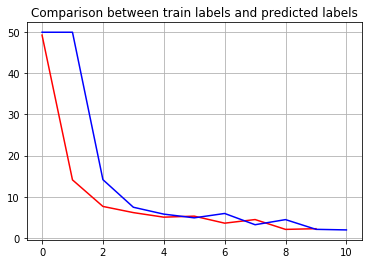

In [16]:
predictions = clf.predict_proba(test_data_scaled)
print(f'The shape of the predictions matrix is: {predictions.shape}')

data_l = np.empty((1, 10))
for i in range(predictions.shape[1]):
    data_l[0, i] = np.mean(predictions[:, i]) * 100
    print(f'Average probability for label {i + 1} ({class_names[i]}): {np.round(data_l[0, i] * 100, 2)}%')

plt.plot(data_l[0, :], c='red')
plt.plot(data[:, 1], c='blue')
plt.grid(True)
plt.title('Comparison between train labels and predicted labels')
plt.show()

In [17]:
def save_prediction_loss(loss):
    prediction = pd.DataFrame(loss,columns=['Class_1','Class_2','Class_3','Class_4','Class_5',
                                            'Class_6','Class_7','Class_8','Class_9','Class_10'])
    prediction.index += 1 
    prediction.to_csv('loss_kaggle.csv',index_label="Sample_id",index=1)
    
save_prediction_loss(predictions)

### Neural Network
This section present another approach, based on a deep Neural Network

In [18]:
from sklearn.neural_network import MLPClassifier

In [19]:
# Set verbose=False to hide training details
mlp = MLPClassifier(activation='relu',
                    alpha=0.0001,
                    hidden_layer_sizes=(100, 100),
                    learning_rate='constant',
                    max_iter=1000,
                    shuffle=True,
                    solver='adam',
                    tol=1e-06,
                    verbose=True
                    )
mlp.fit(train_data_scaled, np.ravel(train_labels_logloss))

Iteration 1, loss = 1.58009408
Iteration 2, loss = 1.26046125
Iteration 3, loss = 1.12960879
Iteration 4, loss = 1.03913510
Iteration 5, loss = 0.96820597
Iteration 6, loss = 0.90480014
Iteration 7, loss = 0.85315428
Iteration 8, loss = 0.80503539
Iteration 9, loss = 0.76228717
Iteration 10, loss = 0.72155516
Iteration 11, loss = 0.68637657
Iteration 12, loss = 0.64867423
Iteration 13, loss = 0.60659654
Iteration 14, loss = 0.57313808
Iteration 15, loss = 0.54589118
Iteration 16, loss = 0.51109059
Iteration 17, loss = 0.48189507
Iteration 18, loss = 0.45342983
Iteration 19, loss = 0.42053928
Iteration 20, loss = 0.39722951
Iteration 21, loss = 0.36707454
Iteration 22, loss = 0.34290336
Iteration 23, loss = 0.31603323
Iteration 24, loss = 0.29351584
Iteration 25, loss = 0.27191675
Iteration 26, loss = 0.25406593
Iteration 27, loss = 0.23372793
Iteration 28, loss = 0.21119840
Iteration 29, loss = 0.19418022
Iteration 30, loss = 0.17756024
Iteration 31, loss = 0.16350675
Iteration 32, los

Iteration 253, loss = 0.00033932
Iteration 254, loss = 0.00033746
Iteration 255, loss = 0.00033522
Iteration 256, loss = 0.00033394
Iteration 257, loss = 0.00033211
Iteration 258, loss = 0.00032944
Iteration 259, loss = 0.00032752
Iteration 260, loss = 0.00032521
Iteration 261, loss = 0.00032343
Iteration 262, loss = 0.00032225
Iteration 263, loss = 0.00032021
Iteration 264, loss = 0.00031813
Iteration 265, loss = 0.00031619
Iteration 266, loss = 0.00031436
Iteration 267, loss = 0.00031278
Iteration 268, loss = 0.00031121
Iteration 269, loss = 0.00030941
Iteration 270, loss = 0.00030749
Iteration 271, loss = 0.00030615
Iteration 272, loss = 0.00030471
Iteration 273, loss = 0.00030337
Iteration 274, loss = 0.00030144
Iteration 275, loss = 0.00030006
Iteration 276, loss = 0.00029841
Iteration 277, loss = 0.00029688
Iteration 278, loss = 0.00029569
Iteration 279, loss = 0.00029419
Iteration 280, loss = 0.00029275
Iteration 281, loss = 0.00029142
Iteration 282, loss = 0.00029011
Iteration 

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=1e-06,
       validation_fraction=0.1, verbose=True, warm_start=False)

In [20]:
nn_score = mlp.score(train_data_scaled, train_labels_logloss)
print(f'Algorithm accuracy is {np.round(nn_score * 100, 2)}%')

Algorithm accuracy is 100.0%


The shape of the predictions matrix is: (6544, 10)
Average probability for label 1 (Pop_Rock): 5275.57%
Average probability for label 2 (Electronic): 1381.5%
Average probability for label 3 (Rap): 713.36%
Average probability for label 4 (Jazz): 639.28%
Average probability for label 5 (Latin): 434.15%
Average probability for label 6 (RnB): 506.79%
Average probability for label 7 (International): 286.2%
Average probability for label 8 (Country): 454.93%
Average probability for label 9 (Reggae): 164.64%
Average probability for label 10 (Blues): 143.57%


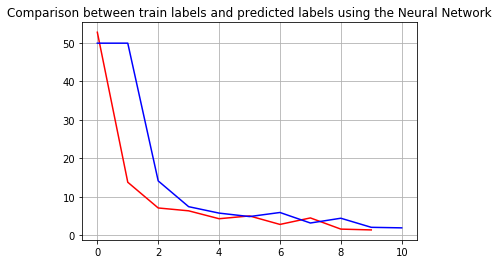

In [21]:
nn_predictions = mlp.predict_proba(test_data_scaled)
print(f'The shape of the predictions matrix is: {nn_predictions.shape}')

data_l_nn = np.empty((1, 10))
for i in range(nn_predictions.shape[1]):
    data_l_nn[0, i] = np.mean(nn_predictions[:, i]) * 100
    print(f'Average probability for label {i + 1} ({class_names[i]}): {np.round(data_l_nn[0, i] * 100, 2)}%')

plt.plot(data_l_nn[0, :], c='red')
plt.plot(data[:, 1], c='blue')
plt.grid(True)
plt.title('Comparison between train labels and predicted labels using the Neural Network')
plt.show()

In [25]:
def save_prediction_loss_nn(loss):
    prediction = pd.DataFrame(loss,columns=['Class_1','Class_2','Class_3','Class_4','Class_5',
                                            'Class_6','Class_7','Class_8','Class_9','Class_10'])
    prediction.index += 1 
    prediction.to_csv('loss_kaggle_nn.csv',index_label="Sample_id",index=1)
    
save_prediction_loss_nn(nn_predictions)

## 4. Results

*Summarize the results of the experiments without discussing their implications.*

*- Include both performance measures (accuracy and LogLoss).*

*- How does it perform on kaggle compared to the train data.*

*- Include a confusion matrix.*



In [22]:
#Confusion matrix ...

## 5. Discussion/Conclusions

*Interpret and explain your results *

*- Discuss the relevance of the performance measures (accuracy and LogLoss) for
imbalanced multiclass datasets. *

*- How the results relate to the literature. *

*- Suggestions for future research/improvement. *

*- Did the study answer your questions? *



## 6. References

*List of all the references cited in the document*

## Appendix
*Any additional material needed to complete the report can be included here. For example, if you want to keep  additional source code, additional images or plots, mathematical derivations, etc. The content should be relevant to the report and should help explain or visualize something mentioned earlier. **You can remove the whole Appendix section if there is no need for it.** *